In [1]:
import random
import csv
import time
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from utils import *

pd.options.mode.use_inf_as_na = True

In [2]:
um= pd.read_csv('csv\\pseudo_random_utility_matrix.csv',index_col=0)

In [3]:
def predict(utility_matrix, q_sim_neighbors, u_sim_neighbors, u_sim_weight, q_sim_weight):
    utility_matrix_copy = utility_matrix.fillna(0)
    output = utility_matrix_copy.copy()
    
    # Get the columns of the utility matrix
    columns = utility_matrix.axes[1]
    
    # Create similarity matrices for users and querries using cosine similarity and standardizing the utility matrix
    q_sim_matrix = query_similarity(utility_matrix_copy,q_sim_neighbors,standardize_matrix=True)
    u_sim_matrix = user_similarity(utility_matrix_copy,u_sim_neighbors,standardize_matrix=True)
    
    
    # Find all the locations in the utility matrix where there is a missing value
    scores_to_predict = np.array(np.where(utility_matrix.fillna(0)== 0)).T
    for i,j in scores_to_predict:
        # Calculate the user similarity score and query similarity score
        q_score = np.dot(utility_matrix_copy.iloc[i], q_sim_matrix[j])/np.dot(q_sim_matrix[j], utility_matrix.iloc[i].notna())
        u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())
        
        # Make predictions by taking a weighted sum of the user similarity score and query similarity score
        output.iloc[i,j] = round(u_sim_weight*u_score + q_sim_weight*q_score, 2)
    return output


In [4]:
import numpy as np
print('Masking 20 % of the data to test')
mask = np.ones((2000,2000))
mask[1600:,1600:]=0
data_to_test=np.array(um)
data_to_test[np.logical_not(mask)] = None
data_to_test_df=pd.DataFrame(data_to_test,columns= um.axes[1],index=um.axes[0])
print('Mask done')

Masking 20 % of the data to test
Mask done


In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error

x1 = np.arange(100, 1100, 100)
y1 = []

for i in x1:
    print('u_sim_neighbors:', i)
    pred = predict(data_to_test_df, q_sim_weight=0, q_sim_neighbors=500, u_sim_neighbors=i, u_sim_weight=1)
    pred1 = pred[um.notna()]
    y_pred = np.array(pred1.fillna(0))[np.logical_not(mask)]
    y_truth = np.array(um.fillna(0))[np.logical_not(mask)]

    # Handle potential infinite or large values
    y_pred = np.nan_to_num(y_pred, nan=0, posinf=1e9, neginf=-1e9)
    y_truth = np.nan_to_num(y_truth, nan=0, posinf=1e9, neginf=-1e9)

    rmse = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_truth))
    y1.append(rmse)
    print('RMSE:', rmse)


u_sim_neighbors: 100


C:\Users\39345\AppData\Local\Temp\ipykernel_316\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 41.15092546575502
u_sim_neighbors: 200


C:\Users\39345\AppData\Local\Temp\ipykernel_316\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 41.32261400405504
u_sim_neighbors: 300


C:\Users\39345\AppData\Local\Temp\ipykernel_316\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 41.38123389641735
u_sim_neighbors: 400


C:\Users\39345\AppData\Local\Temp\ipykernel_316\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 23.941973509038473
u_sim_neighbors: 500
RMSE: 8.073304249887402
u_sim_neighbors: 600


C:\Users\39345\AppData\Local\Temp\ipykernel_316\1681435725.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 981674839115055.6
u_sim_neighbors: 700
RMSE: 9.691538338029726
u_sim_neighbors: 800
RMSE: 9.557761371458799
u_sim_neighbors: 900
RMSE: 10.925972062933347
u_sim_neighbors: 1000
RMSE: 14.65868627367405


In [5]:
pred=predict(data_to_test_df,q_sim_weight=0,q_sim_neighbors=500, u_sim_neighbors=600,u_sim_weight=1)

C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


In [19]:
pred[0]

In [6]:
print(pred.mean(),pred.min(),pred.max())

Q1       38.813290
Q2       38.472395
Q3       81.071130
Q4       59.395775
Q5       42.099880
           ...    
Q1996    78.489335
Q1997    79.734700
Q1998    58.221100
Q1999    42.645265
Q2000    58.728325
Length: 2000, dtype: float64 Q1          1.00
Q2          1.00
Q3          1.00
Q4          1.00
Q5          1.00
          ...   
Q1996   -1036.77
Q1997    -833.63
Q1998    -593.57
Q1999   -2116.00
Q2000    -388.54
Length: 2000, dtype: float64 Q1         96.00
Q2         99.00
Q3        100.00
Q4        100.00
Q5        100.00
          ...   
Q1996     343.60
Q1997    1763.66
Q1998     275.73
Q1999     278.54
Q2000    1152.28
Length: 2000, dtype: float64


In [8]:
pred1=np.clip(pred,a_min=0,a_max=100)
pred1=pred1[um.notna()]
y_pred=np.array(pred1.fillna(0))[np.logical_not(mask)]
y_truth=np.array(um.fillna(0))[np.logical_not(mask)]
print('RMSE:',sqrt(mean_squared_error(y_pred=y_pred,y_true=y_truth)))

RMSE: 19.616469476070996


In [9]:
#search for the best u_sim_neighbors
x1=np.arange(100,1100,100)
y1=[]
for i in x1:
    print('u_sim_neighbors:',i)
    pred=predict(data_to_test_df,q_sim_weight=0,q_sim_neighbors=500, u_sim_neighbors=i,u_sim_weight=1)
    pred1=np.clip(pred,a_min=0,a_max=100)
    pred1=pred1[um.notna()]
    y_pred=np.array(pred1.fillna(0))[np.logical_not(mask)]
    y_truth=np.array(um.fillna(0))[np.logical_not(mask)]
    y1.append(sqrt(mean_squared_error(y_pred=y_pred,y_true=y_truth)))
    print('RMSE:',sqrt(mean_squared_error(y_pred=y_pred,y_true=y_truth)))

u_sim_neighbors: 100


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 41.15092546575502
u_sim_neighbors: 200


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 41.32261400405504
u_sim_neighbors: 300


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 41.38123389641735
u_sim_neighbors: 400


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 23.941973509038473
u_sim_neighbors: 500
RMSE: 8.073076960993559
u_sim_neighbors: 600


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 19.616469476070996
u_sim_neighbors: 700
RMSE: 9.535773228873472
u_sim_neighbors: 800
RMSE: 9.557375211551287
u_sim_neighbors: 900
RMSE: 10.72601011239734
u_sim_neighbors: 1000
RMSE: 12.34525533550238


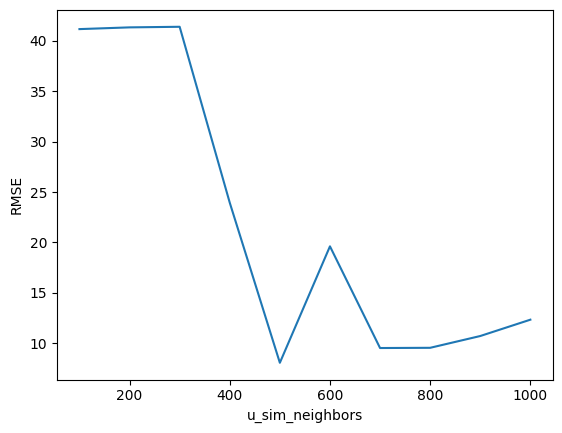

In [10]:
plt.plot(x1,y1)
plt.ylabel('RMSE')
plt.xlabel('u_sim_neighbors')
plt.show()

[41.15092546575502, 41.32261400405504, 41.38123389641735, 23.941973509038473, 8.073076960993559, 19.616469476070996, 9.535773228873472, 9.557375211551287, 10.72601011239734, 12.34525533550238]
[41.15092546575502, 41.32261400405504, 41.38123389641735, 23.941973509038473, 8.073076960993559, 8.804425094933515, 9.535773228873472, 9.557375211551287, 10.72601011239734, 12.34525533550238]


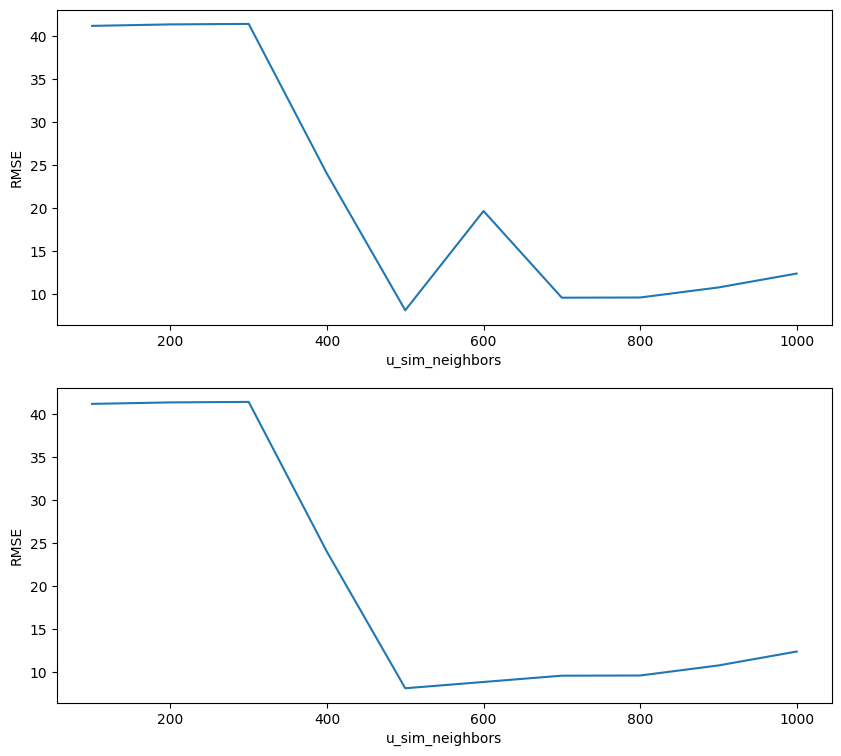

In [11]:

print(y1)
plt.figure(figsize = (10, 9))

plt.subplot(211)
plt.plot(x1,y1)
plt.ylabel('RMSE')
plt.xlabel('u_sim_neighbors')

plt.subplot(212)
temp_y1 = y1.copy()
temp_y1[5] = (temp_y1[4] + temp_y1[6]) / 2
print(temp_y1)
plt.plot(x1, temp_y1)
plt.ylabel('RMSE')
plt.xlabel('u_sim_neighbors')

plt.show()


In [12]:
from joblib import dump, load
dump(y1, 'C:/Users/39345/PycharmProjects/Data_mining/filename.joblib')

['C:/Users/39345/PycharmProjects/Data_mining/filename.joblib']

In [13]:
#search for the best q_sim_neighbors
x2=np.arange(100,1100,100)
y2=[]
for i in x2:
    print('q_sim_neighbors:',i)
    pred=predict(data_to_test_df,q_sim_weight=1,q_sim_neighbors=i, u_sim_neighbors=200,u_sim_weight=0)
    pred1=pred[um.notna()]
    y_pred=np.array(pred1.fillna(0))[np.logical_not(mask)]
    y_truth=np.array(um.fillna(0))[np.logical_not(mask)]
    y2.append(sqrt(mean_squared_error(y_pred=y_pred,y_true=y_truth)))
    print('RMSE:',sqrt(mean_squared_error(y_pred=y_pred,y_true=y_truth)))

q_sim_neighbors: 100


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:17: RuntimeWarning: invalid value encountered in scalar divide
  q_score = np.dot(utility_matrix_copy.iloc[i], q_sim_matrix[j])/np.dot(q_sim_matrix[j], utility_matrix.iloc[i].notna())
C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 42.44634908630982
q_sim_neighbors: 200


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:17: RuntimeWarning: invalid value encountered in scalar divide
  q_score = np.dot(utility_matrix_copy.iloc[i], q_sim_matrix[j])/np.dot(q_sim_matrix[j], utility_matrix.iloc[i].notna())
C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 42.0321681984614
q_sim_neighbors: 300


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:17: RuntimeWarning: invalid value encountered in scalar divide
  q_score = np.dot(utility_matrix_copy.iloc[i], q_sim_matrix[j])/np.dot(q_sim_matrix[j], utility_matrix.iloc[i].notna())
C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 41.39988557591373
q_sim_neighbors: 400


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:17: RuntimeWarning: invalid value encountered in scalar divide
  q_score = np.dot(utility_matrix_copy.iloc[i], q_sim_matrix[j])/np.dot(q_sim_matrix[j], utility_matrix.iloc[i].notna())
C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 41.36792679774695
q_sim_neighbors: 500


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 41.39344266771762
q_sim_neighbors: 600


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 41.434809078825865
q_sim_neighbors: 700


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 41.47259191820997
q_sim_neighbors: 800


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 41.47248446434847
q_sim_neighbors: 900


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 41.474322800416225
q_sim_neighbors: 1000


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 41.48124126145003


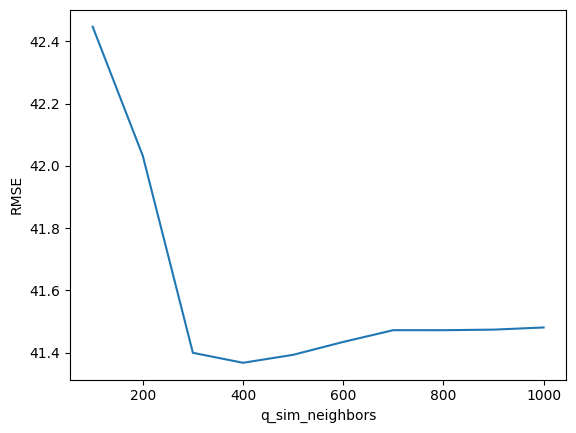

In [14]:
plt.plot(x2,y2)
plt.ylabel('RMSE')
plt.xlabel('q_sim_neighbors')
plt.show()

Text(0.5, 0, 'KNN')

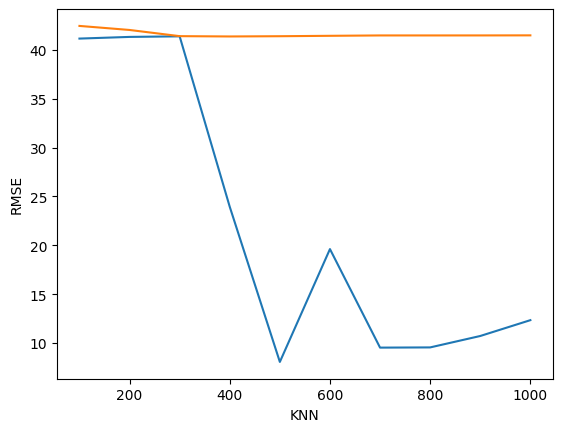

In [15]:
plt.plot(x1, y1, label = "u_sim_neighbors")
plt.plot(x2, y2, label = "q_sim_neighbors")
plt.ylabel('RMSE')
plt.xlabel('KNN')


q_sim_weight: 0.0


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 981674839115055.6
q_sim_weight: 0.1


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 883507355203550.0
q_sim_weight: 0.2


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 785339871292044.5
q_sim_weight: 0.30000000000000004


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 687172387380538.9
q_sim_weight: 0.4


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 589004903469033.4
q_sim_weight: 0.5


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 490837419557527.8
q_sim_weight: 0.6000000000000001


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 392669935646022.1
q_sim_weight: 0.7000000000000001


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 294502451734516.6
q_sim_weight: 0.8


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 196334967823011.12
q_sim_weight: 0.9


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


RMSE: 98167483911505.58
q_sim_weight: 1.0


C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())
C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:21: RuntimeWarning: invalid value encountered in scalar multiply
  output.iloc[i,j] = round(u_sim_weight*u_score + q_sim_weight*q_score, 2)


RMSE: 13.442533637697359


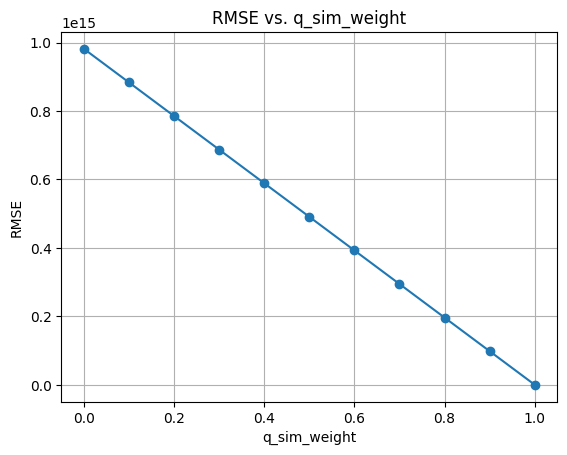

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Existing code
x = np.arange(0, 1.1, 0.1)
y = []

for i in x:
    print('q_sim_weight:', i)
    try:
        pred = predict(data_to_test_df, q_sim_weight=i, q_sim_neighbors=600, u_sim_neighbors=600, u_sim_weight=1-i)
        pred1 = pred[um.notna()]
        y_pred = np.array(pred1.fillna(0))[np.logical_not(mask)]
        y_truth = np.array(um.fillna(0))[np.logical_not(mask)]
        y.append(np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_truth)))
        print('RMSE:', np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_truth)))
    except (ValueError, ZeroDivisionError) as e:
        print(f"An error occurred: {e}")
        y.append(np.inf)

# Plotting the results
plt.plot(x, y, marker='o')
plt.xlabel('q_sim_weight')
plt.ylabel('RMSE')
plt.title('RMSE vs. q_sim_weight')
plt.grid(True)
plt.show()


In [17]:
#fill the matrix with the best hyperparmeters
pred=predict(data_to_test_df,q_sim_weight=0,q_sim_neighbors=500, u_sim_neighbors=400,u_sim_weight=1)
pred.to_csv('./csv/predicted_utility_matrix.csv')

C:\Users\39345\AppData\Local\Temp\ipykernel_2800\1681435725.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u_score = np.dot(utility_matrix_copy[columns[j]], u_sim_matrix[i])/np.dot(u_sim_matrix[i], utility_matrix[columns[j]].notna())


In [18]:
pred.isna().sum().sum()

39059

In [19]:
def top_k_queries(user_id, k: int, predictions):

    user_predictions = predictions.loc[user_id]
    user_predictions = user_predictions.sort_values(ascending=False)
    return(user_predictions[:k].index.to_list())

In [20]:
pred=pd.read_csv('csv\predicted_utility_matrix.csv',index_col=0)
top_k_queries('U100',5,pred)

['Q560', 'Q205', 'Q355', 'Q291', 'Q1413']

In [21]:
x3=range(100,1100,100)
y3=[]
for i in x3:
    sim=0
    for j in range(1601,2001):
        sim+=jaccard_similarity(top_k_queries('U'+str(j),i,um.fillna(0)),top_k_queries('U'+str(j),i,pred1.fillna(0)))
    y3.append(sim/400)

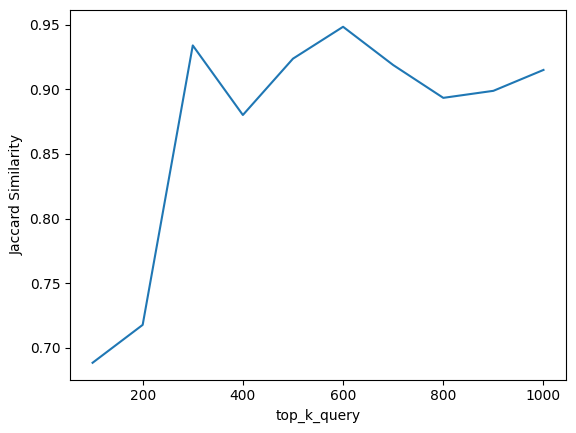

In [22]:
plt.plot(x3,y3,)
plt.xlabel('top_k_query')
plt.ylabel('Jaccard Similarity')
plt.savefig('topk.png')